# Download Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Capstone+Project+1.zip to Capstone+Project+1.zip


In [ ]:
from zipfile import ZipFile

with ZipFile('Capstone+Project+1.zip', 'r') as zipfile:
    zipfile.extractall('dataset')

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [ ]:
x = pd.read_csv('/content/dataset/Credit_card.csv')
y = pd.read_csv('/content/dataset/Credit_card_label.csv')

In [ ]:
# merging
credit_card = x.merge(y)

# Data Structure

In [ ]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# renaming columns
credit_card.rename(columns={'Ind_ID':'ind_id','GENDER':'gender',
                            'Car_Owner':'car_owner',
                            'Propert_Owner':'property_owner',
                            'CHILDREN':'children',
                            'Annual_income':'annual_income',
                            'Type_Income':'type_income',
                            'EDUCATION':'education',
                            'Marital_status':'marital_status',
                            'Housing_type':'housing_type',
                            'Birthday_count':'birthday_count',
                            'Employed_days':'employed_days',
                            'Mobile_phone':'mobile_phone',
                            'Work_Phone':'work_phone','Phone':'phone',
                            'EMAIL_ID':'email_id',
                            'Type_Occupation':'type_occupation',
                            'Family_Members':'family_members'
                            }, inplace=True)

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind_id           1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   property_owner   1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  birthday_count   1526 non-null   float64
 11  employed_days    1548 non-null   int64  
 12  mobile_phone     1548 non-null   int64  
 13  work_phone       1548 non-null   int64  
 14  phone            1548 non-null   int64  
 15  email_id         1548 non-null   int64  
 16  type_occupation  1060 non-null   object 
 17  family_members

In [ ]:
credit_card.describe()

,ind_id,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


Percentage:
 0    88.69509
1    11.30491
Name: label, dtype: float64


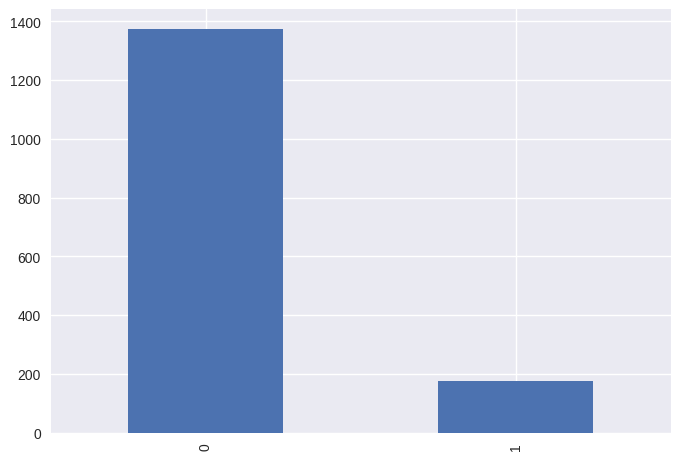

In [ ]:
# label
credit_card['label'].value_counts().plot(kind='bar')
print("Percentage:\n",(credit_card['label'].value_counts()/len(credit_card)*100))


In [ ]:
credit_card['type_income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: type_income, dtype: int64

In [ ]:
credit_card['education'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: education, dtype: int64

In [ ]:
credit_card['housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: housing_type, dtype: int64

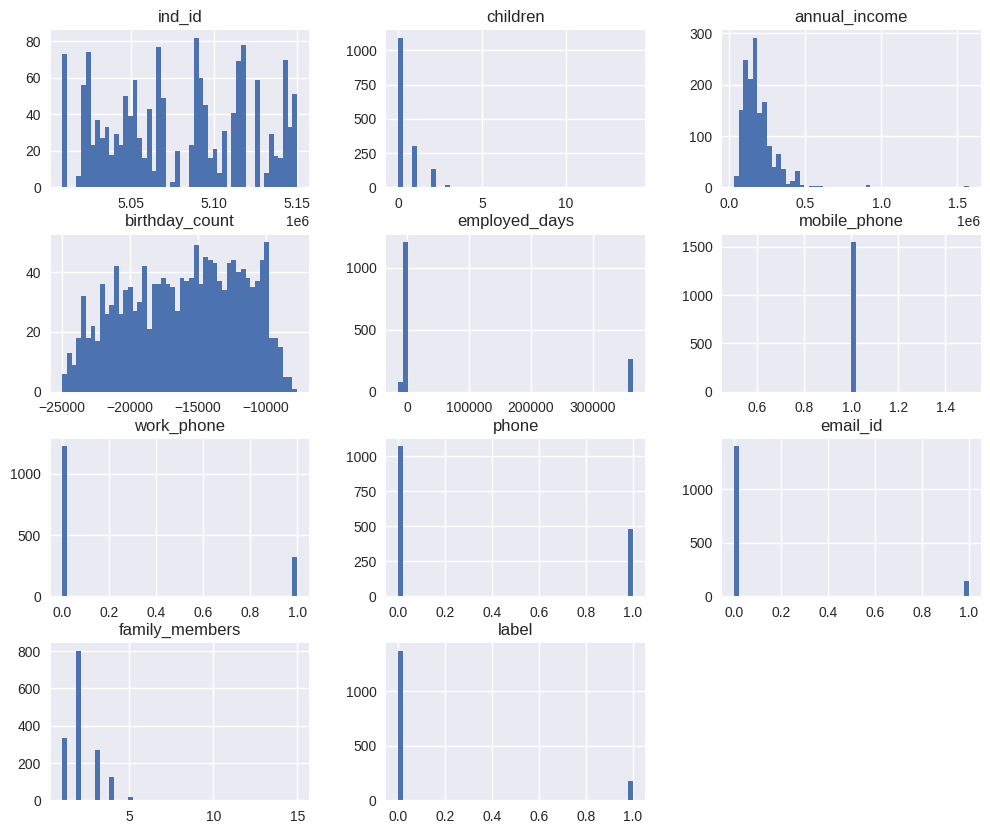

In [ ]:
credit_card.hist(bins=50, figsize=(12,10))
plt.show()

*   **There are 1548 samples.**
*   **gender has 1541 non-null values, 7 distinct values missing, can be replaced using mode.**
*   **annual_income has 1525 non-null values, meaning 23 values missing, can be replaced using median.**
*   **birthday_count has 1526 non-null values, meaning 22 values missing, can be replaced using median.**
*   **type_occupation has 1060 non-null values, meaning 488 values missing, more than 30% values are missing , so dropping the column.**
*   **children contains max value of 14, and family_members column contains 15 of same sample, can be a outlier, but neglected.**
*   **employed_days contains outlier value 365243, but positive values are unemployed so can be turned to 0.**
*   **Target variable is imbalanced 88 % on 0 and 11% on 1**

**KEY FINDINGS**

*   **annual_income which is a sensible variable w.r.t the target variable is of right skewed**.

*   **type_occupation column having more than 30% missing values so can be dropped.**

*   **There are features with different scale like in birthday_count and employed_dates that can be scaled**

# Create Categorical and Numerical variables seperatly

In [ ]:
credit_data = credit_card.copy()

credit_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# selecting categorical variables
cat_credit_card = credit_card.select_dtypes(include=object)

In [ ]:
num_credit_card = credit_card.select_dtypes(include=np.number)

# Exploratory Data Analysis

## Univariant Analysis

### Categorical variables

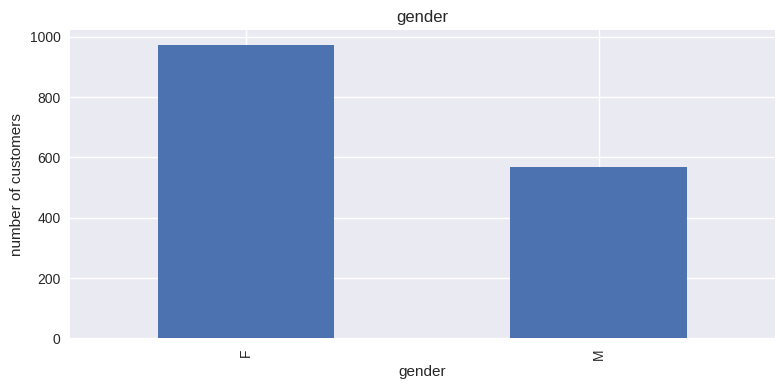

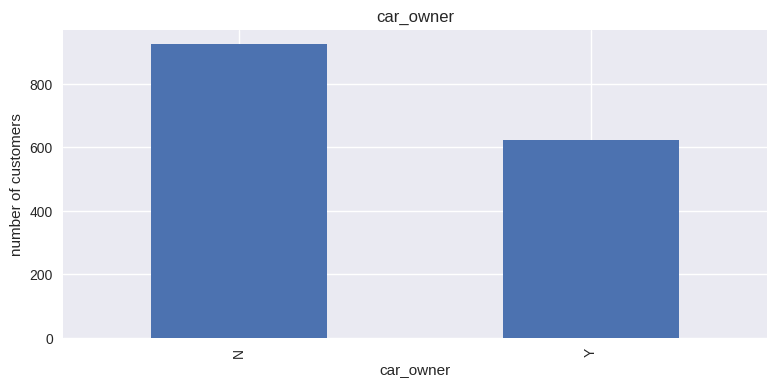

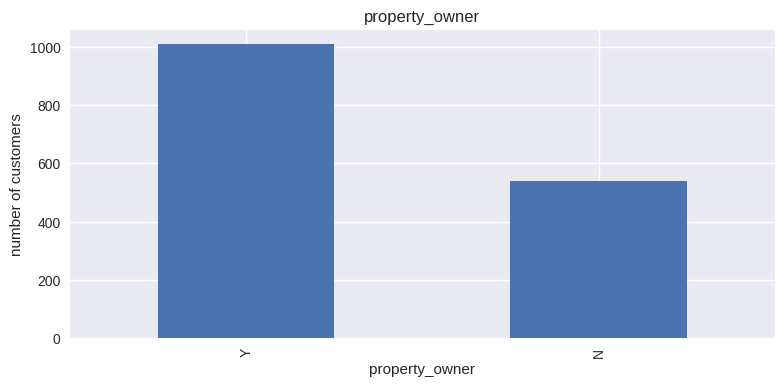

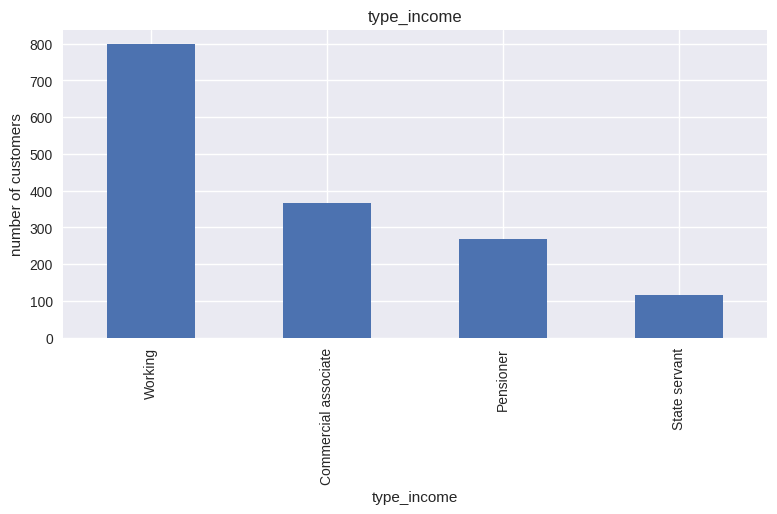

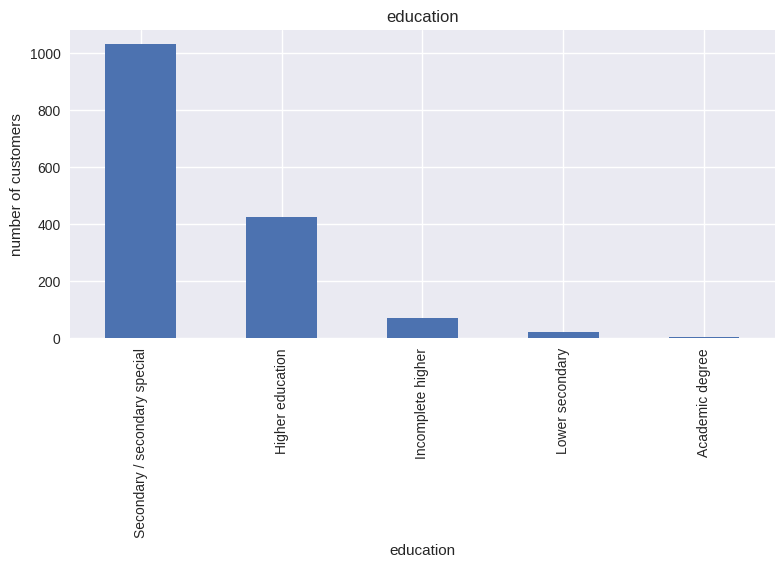

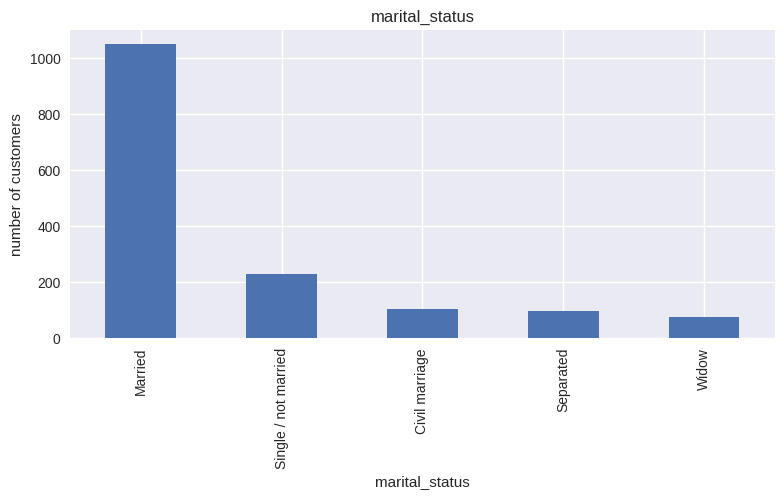

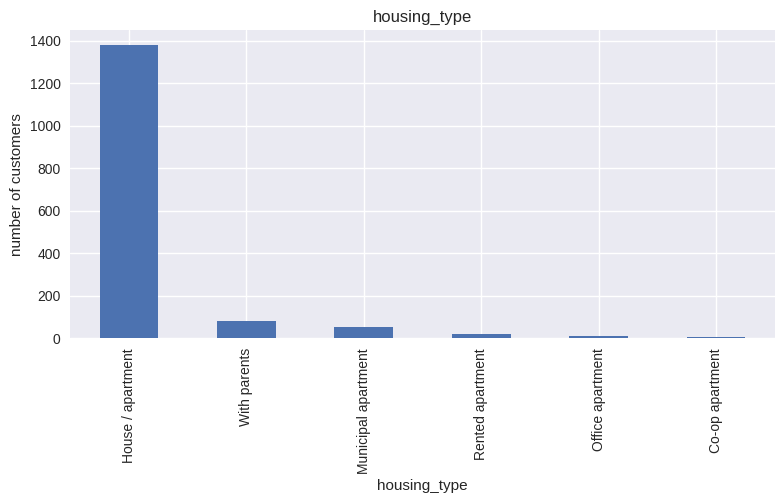

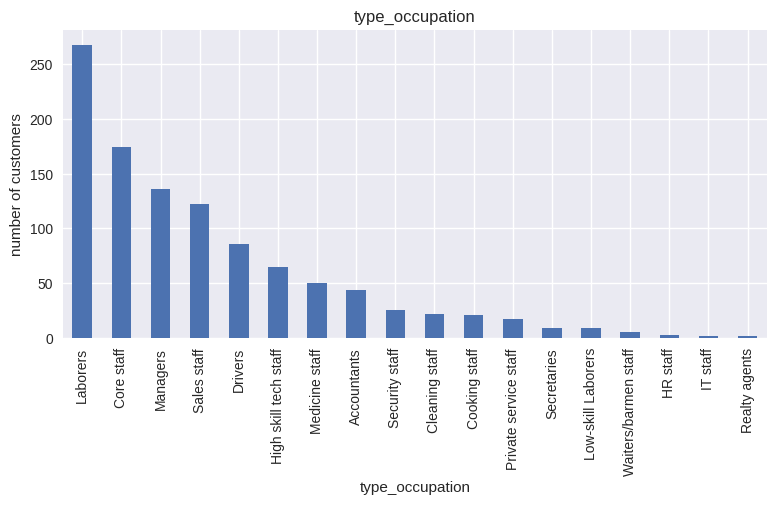

In [ ]:
for column in cat_credit_card:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    credit_data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

<Axes: ylabel='count'>

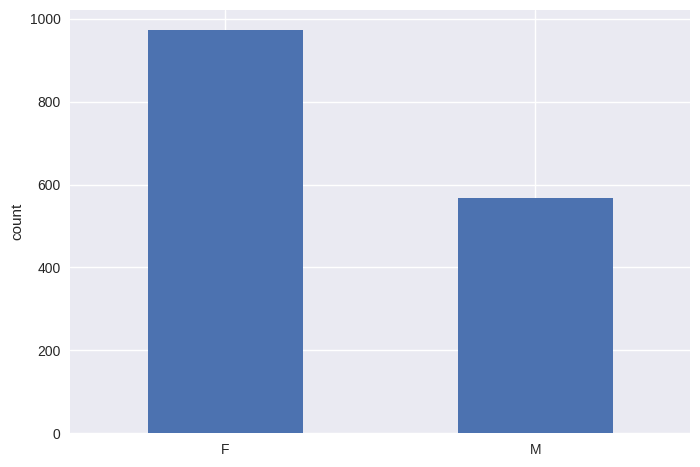

In [ ]:
credit_data['gender'].value_counts().plot(kind='bar', rot=0, grid=True, ylabel='count')

*   **Most of customers are married and own house/apartment**
*   **Majority of customers dont have credit card in general**


### Numerical Variables

In [ ]:
num_credit_card.head()

,ind_id,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,1
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,1
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,1


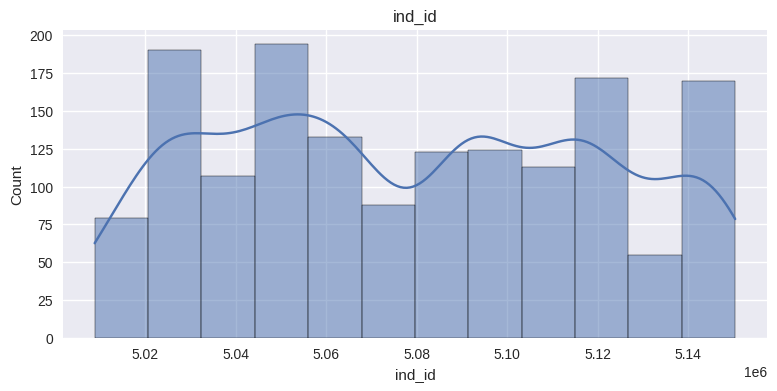

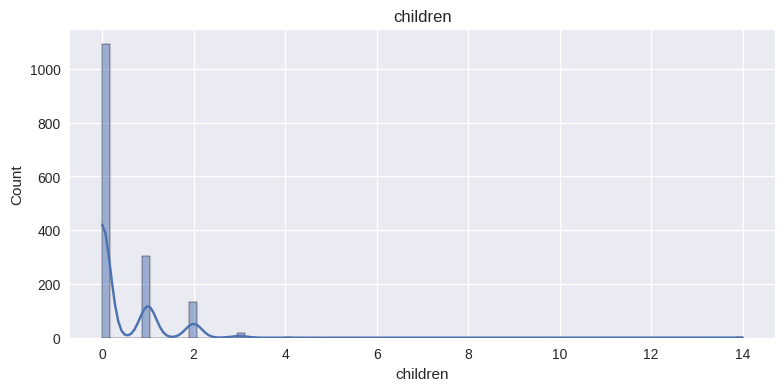

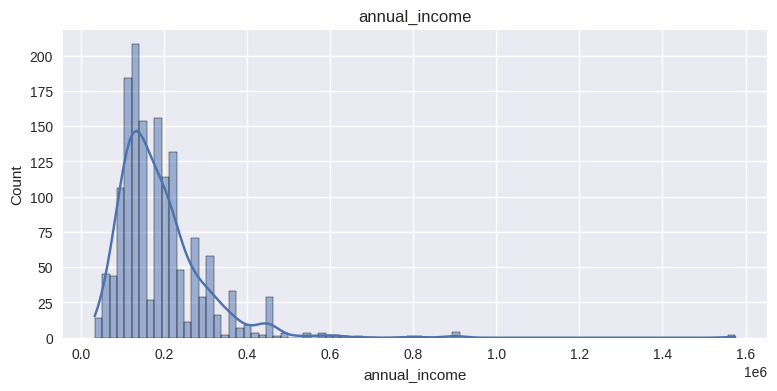

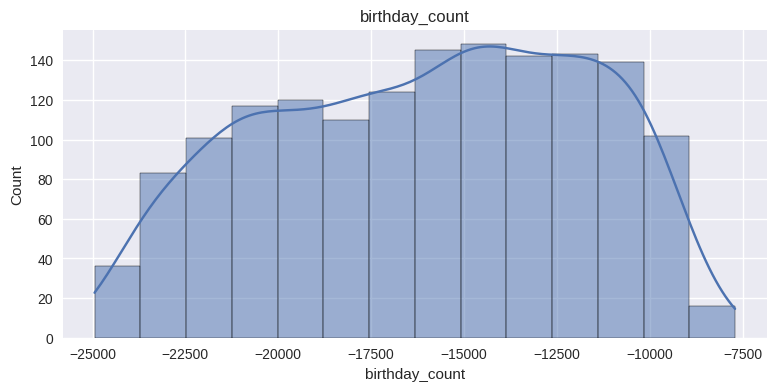

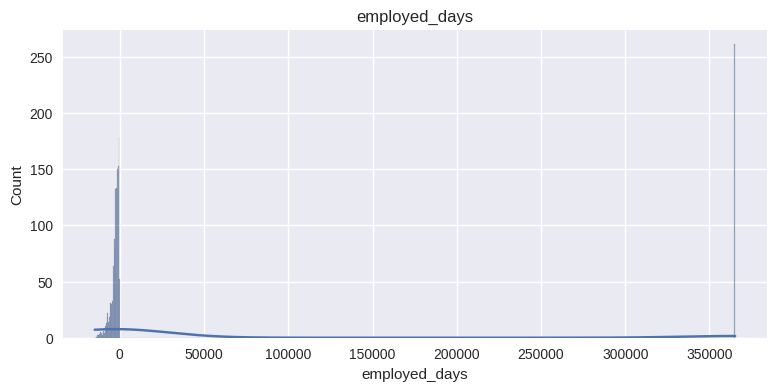

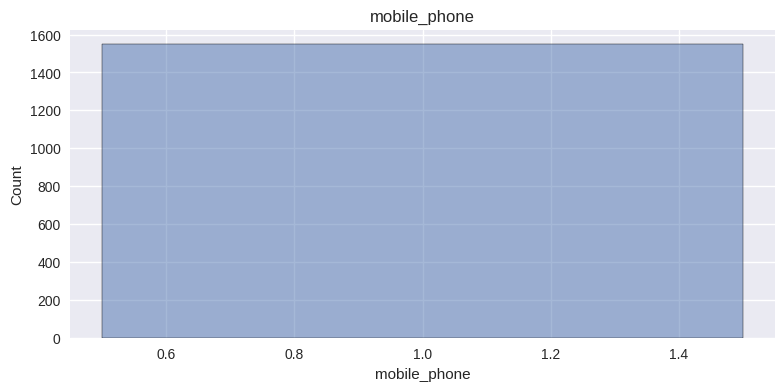

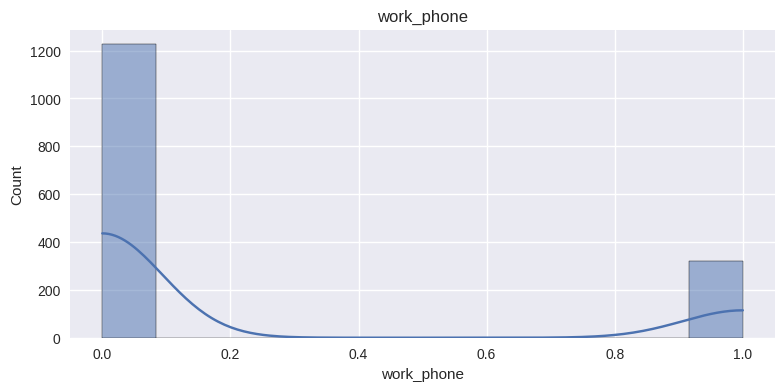

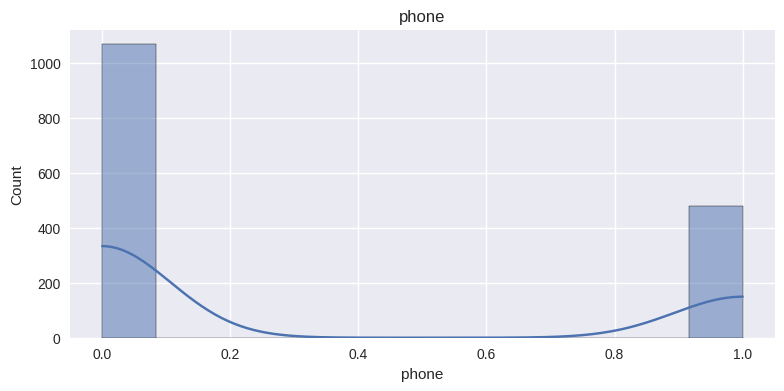

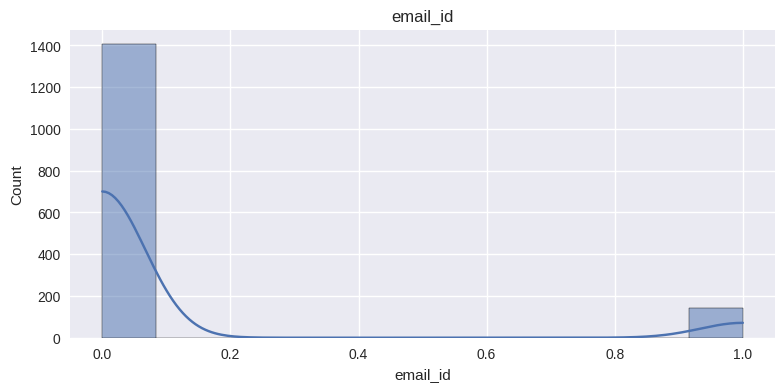

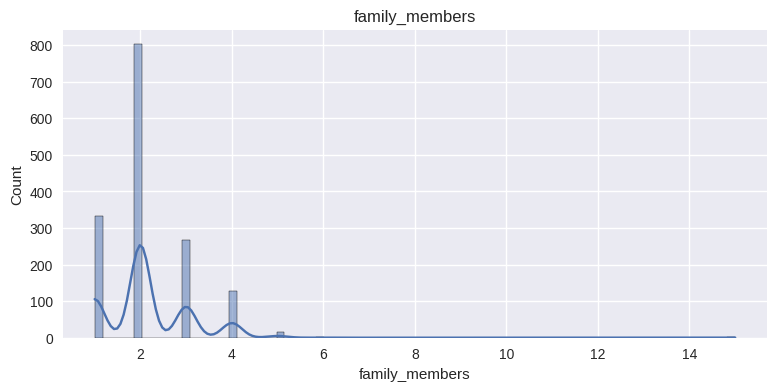

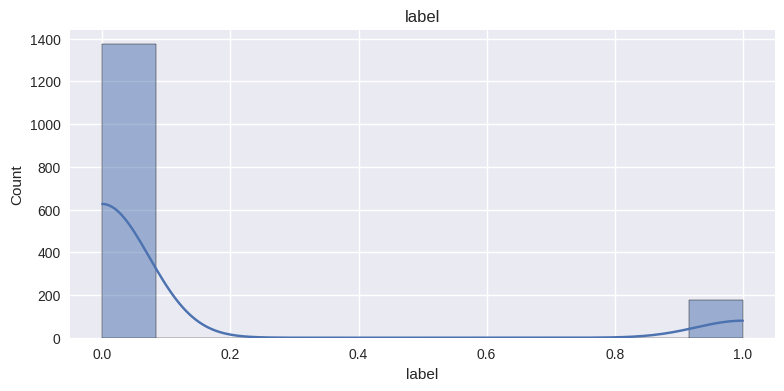

In [ ]:
for column in num_credit_card:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(credit_card[column], kde=True)
    plt.title(column)

*   **Some of data is heavly skewed, containing outliers**
*   **Every customer have mobile phone**
*   **Employed days contains outlier value, which refers to unemployed , can be replaced with 0**
*   **Children and family members contain an outlier but only 1 sample**

## BivariantAnalysis

### Categorical Variables

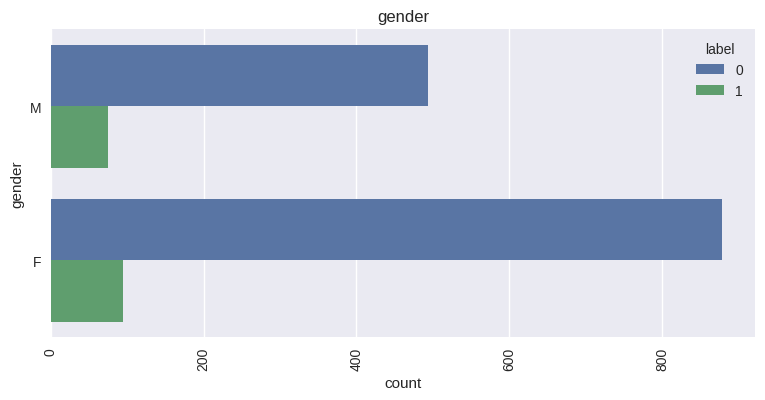

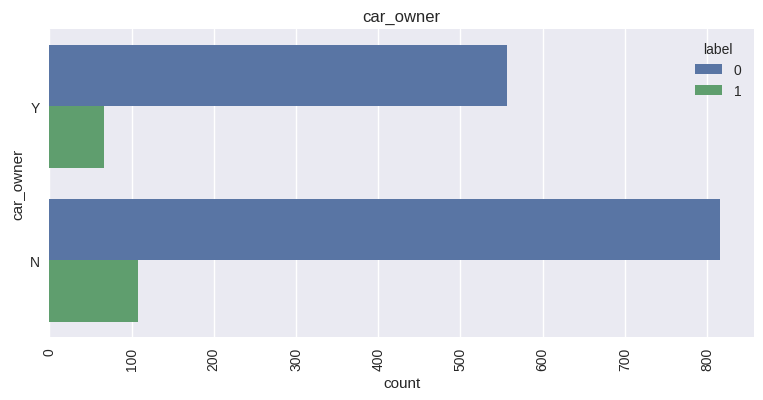

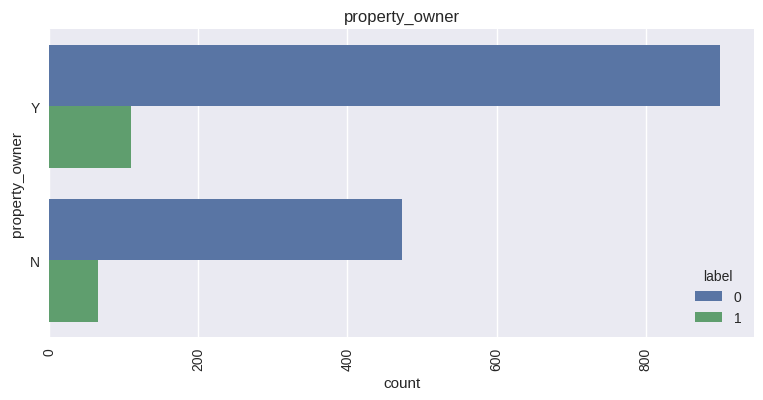

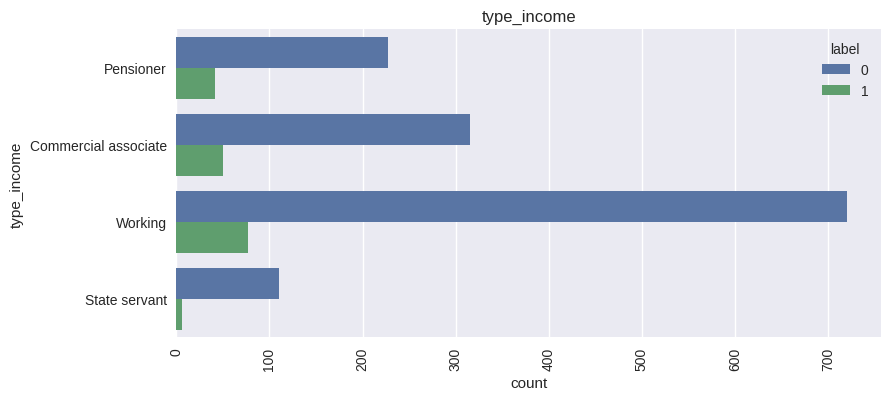

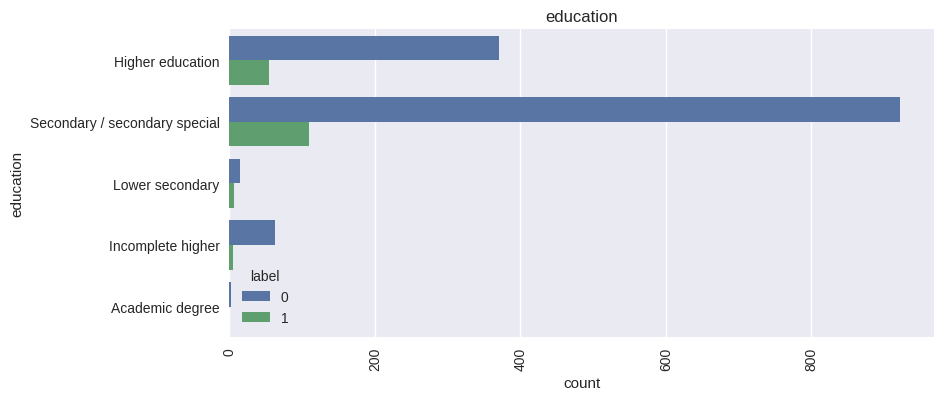

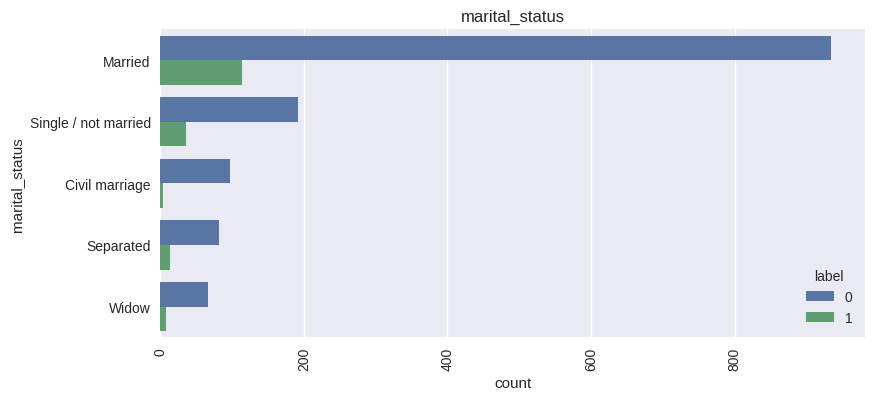

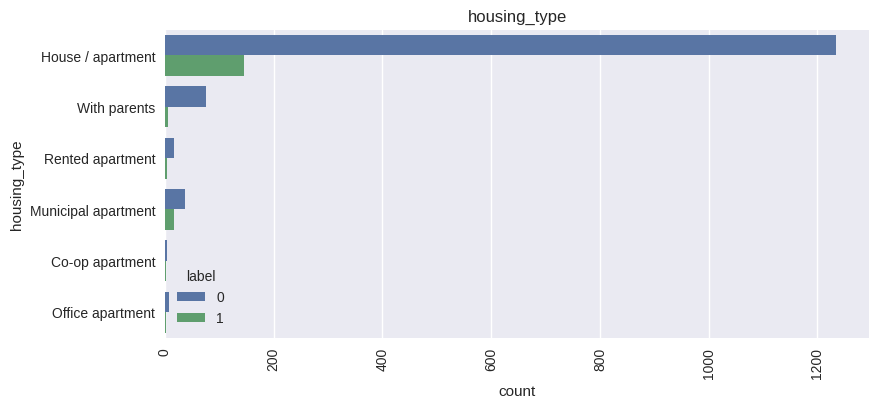

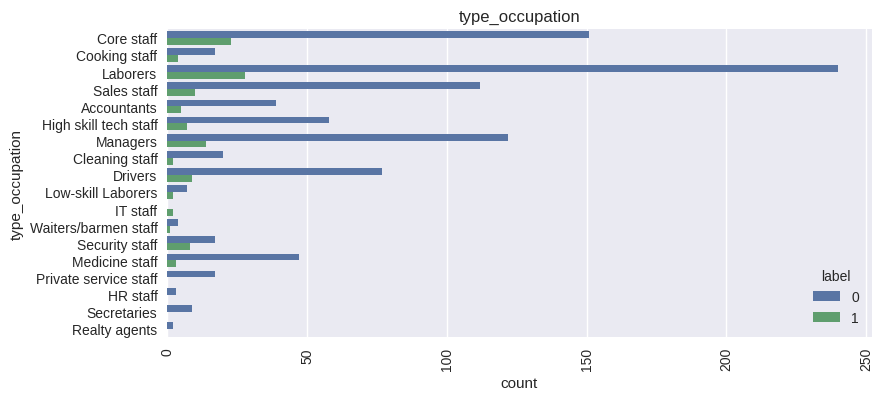

In [ ]:
for column in cat_credit_card:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(y=credit_card[column], hue=credit_card["label"])
    plt.title(column)
    plt.xticks(rotation=90)

*   **Customers like laborers, staff, managers are more likely to use credit cards.**
*   **They are mostly married**
*   **They hold a university degree, but most of theme are secondary**


### Numerical Variables

<Axes: >

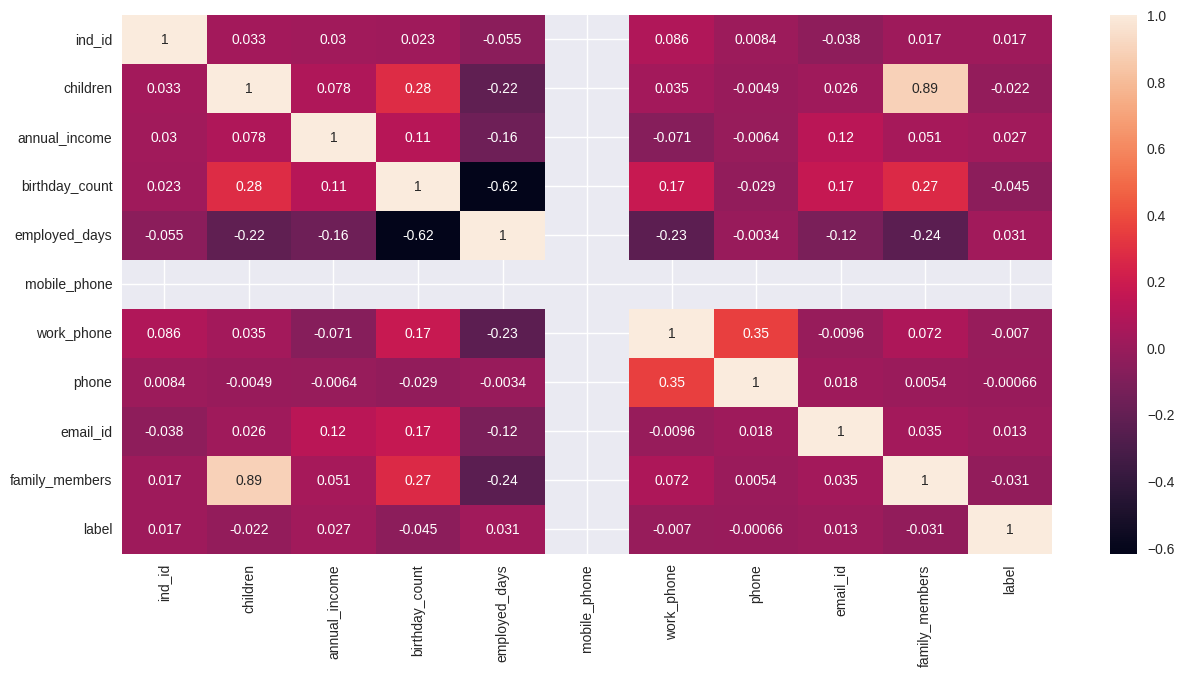

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(num_credit_card.corr(), annot=True)

**There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.**

# Data Cleaning

### Dropping Columns

In [ ]:
credit_data.drop(columns=['type_occupation'], axis=1, inplace=True)

## Replace Null Values

## categorical

In [ ]:
cat_credit_card.isnull().sum()

gender               7
car_owner            0
property_owner       0
type_income          0
education            0
marital_status       0
housing_type         0
type_occupation    488
dtype: int64

In [ ]:
credit_data['gender'].fillna(cat_credit_card['gender'].mode(), inplace=True)

**Replace gender column with mode and removing type_occupation column**

### Numerical

In [ ]:
num_credit_card.isnull().sum()

ind_id             0
children           0
annual_income     23
birthday_count    22
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
family_members     0
label              0
dtype: int64

In [ ]:
credit_data['annual_income'].fillna(num_credit_card['annual_income'].median(), inplace=True)

In [ ]:
credit_data['birthday_count'].fillna(num_credit_card['birthday_count'].median(), inplace=True)

*   **replace annual income with median value**
*   **replace birthday count with median value**

# SQL

In [ ]:
import duckdb

In [ ]:
conn = duckdb.connect()
conn.register('credit_data', credit_data)

### 1. Group the customers based on their income type and find the average of their annual income.

In [ ]:
conn.execute("SELECT type_income, AVG(annual_income) AS average_annual_income FROM credit_data GROUP BY type_income").fetchdf()

,type_income,average_annual_income
0,Pensioner,155343.496283
1,Working,180848.210526
2,State servant,211422.413793
3,Commercial associate,233107.397260


### 2. Find the female owners of cars and property

In [ ]:
conn.execute("SELECT * FROM credit_data WHERE gender = 'F' AND car_owner = 'Y' AND property_owner = 'Y'").fetchdf()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,2,1
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,2,1
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,2,1
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185,1,0,1,0,2,1
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23835.0,365243,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,-9441.0,-157,1,0,0,0,3,0
173,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,-22077.0,365243,1,0,1,0,2,0
174,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12559.0,-5862,1,0,1,0,5,0
175,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,3,0


###3. Find the male customers who are staying with their families.



In [ ]:
conn.execute("SELECT * FROM credit_data WHERE gender = 'M' AND family_members > 1").fetchdf()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,3,1
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,3,1
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,1,0,0,1,3,1
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16896.0,-248,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17975.0,-3476,1,0,0,0,2,0
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13336.0,-1436,1,0,0,0,2,0
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,3,0
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,4,0


###4. Please list the top five people having the highest income

In [ ]:
conn.execute("SELECT * FROM credit_data \
    ORDER BY annual_income DESC\
    LIMIT 5\
").fetchdf()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-15380.0,-4509,1,0,0,0,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,4,0


##5. How many married people are having bad credit

In [ ]:
conn.execute("SELECT COUNT(*) as Count FROM credit_data \
    WHERE marital_status = 'Married'\
    AND label = 0\
").fetchdf()

,Count
0,935


##6. What is the highest education level and what is the total count?

In [ ]:
conn.execute("SELECT COUNT(*) as Highest_Education_level_Count FROM credit_data \
    WHERE education = 'Academic degree'\
").fetchdf()

,Highest_Education_level_Count
0,2


### 7. Between married males and females, who is having more bad credit?

In [ ]:
conn.execute("SELECT gender, COUNT(*) AS total_individuals FROM credit_data GROUP BY gender, LABEL HAVING label = 0;").fetchdf()

,gender,total_individuals
0,M,493
1,None,2
2,F,878


# Data Wrangling

In [ ]:
trans_data = credit_data.copy()

### Categorical to Numerical

In [ ]:
cat_columns = list(cat_credit_card.columns)
cat_columns.remove('type_occupation')

In [ ]:
cat_encoder = preprocessing.LabelEncoder()

In [ ]:
for col in cat_columns:
    trans_data[col] = cat_encoder.fit_transform(trans_data[col])

In [ ]:
trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,-15661.5,-586,1,1,1,0,2,1
3,5009749,0,1,0,0,166500.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1


In [ ]:
# scale annual income to values between 0 and 1

scaler = preprocessing.MinMaxScaler()

trans_data['annual_income'] = scaler.fit_transform(trans_data[['annual_income']])

trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,1,1,1,0,0.094891,1,1,1,1,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
2,5009746,0,1,0,0,0.182482,0,1,1,1,-15661.5,-586,1,1,1,0,2,1
3,5009749,0,1,0,0,0.086131,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1


In [ ]:
# birthday count

# birthday column converted to age in years
trans_data['new_birthday_count'] = trans_data['birthday_count'].apply(lambda x: int(abs(x)/365))

trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label,new_birthday_count
0,5008827,1,1,1,0,0.094891,1,1,1,1,-18772.0,365243,1,0,0,0,2,1,51
1,5009744,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37
2,5009746,0,1,0,0,0.182482,0,1,1,1,-15661.5,-586,1,1,1,0,2,1,42
3,5009749,0,1,0,0,0.086131,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37
4,5009752,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37


In [ ]:
# employed days

# create new employed days columns which return the number of years
def function(x):
    if x>0:
        return 0
    else:
        return int(abs(x)/365)

trans_data['new_employed_days'] = trans_data['employed_days'].apply(function)

trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label,new_birthday_count,new_employed_days
0,5008827,1,1,1,0,0.094891,1,1,1,1,-18772.0,365243,1,0,0,0,2,1,51,0
1,5009744,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37,1
2,5009746,0,1,0,0,0.182482,0,1,1,1,-15661.5,-586,1,1,1,0,2,1,42,1
3,5009749,0,1,0,0,0.086131,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37,1
4,5009752,0,1,0,0,0.182482,0,1,1,1,-13557.0,-586,1,1,1,0,2,1,37,1


In [ ]:
# dropping birthday_count and employed_days old column

trans_data.drop(['birthday_count', 'employed_days'],axis=1, inplace=True)

trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,family_members,label,new_birthday_count,new_employed_days
0,5008827,1,1,1,0,0.094891,1,1,1,1,1,0,0,0,2,1,51,0
1,5009744,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,2,1,37,1
2,5009746,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,2,1,42,1
3,5009749,0,1,0,0,0.086131,0,1,1,1,1,1,1,0,2,1,37,1
4,5009752,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,2,1,37,1


In [ ]:
# scaling remaining columns

for ccol in ['family_members', 'new_birthday_count', 'new_employed_days']:
    trans_data[ccol] = scaler.fit_transform(trans_data[[ccol]])

trans_data.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,family_members,label,new_birthday_count,new_employed_days
0,5008827,1,1,1,0,0.094891,1,1,1,1,1,0,0,0,0.071429,1,0.638298,0.000
1,5009744,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025
2,5009746,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.446809,0.025
3,5009749,0,1,0,0,0.086131,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025
4,5009752,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025


In [ ]:
# dropping ind_id column
trans_data.drop('ind_id' , axis=1, inplace=True)

trans_data.head()


,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,family_members,label,new_birthday_count,new_employed_days
0,1,1,1,0,0.094891,1,1,1,1,1,0,0,0,0.071429,1,0.638298,0.000
1,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025
2,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.446809,0.025
3,0,1,0,0,0.086131,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025
4,0,1,0,0,0.182482,0,1,1,1,1,1,1,0,0.071429,1,0.340426,0.025


#Modeling

###handling imbalanced data

In [ ]:
data = trans_data.copy()

In [ ]:
features = data.drop('label', axis=1)
label = data['label']

In [ ]:
from imblearn.combine import SMOTETomek

#initialising oversampling
smote= SMOTETomek()

#implementing oversampling to training data
x_sm, y_sm= smote.fit_resample(features,label)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

1    1364
0    1364
Name: label, dtype: int64

**For treating the imbalance in data smote is used**

### Train Test Split

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)


In [ ]:
from sklearn import linear_model
from sklearn import metrics


In [ ]:
# selecting the classifier
def logistic_regression():
    model = linear_model.LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]

    params = dict(solver=solvers,penalty=penalty,C=c_values)

    # defining stratified Kfold cross validation
    cv_log= model_selection.StratifiedKFold(n_splits=5)

    # using gridsearch for respective parameters
    gridsearch_log= model_selection.GridSearchCV(model, params, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

    # fitting the model on resampled data
    gridsearch_log.fit(X_train, y_train)

    # printing best score and best parameters
    print("best score is:" ,gridsearch_log.best_score_)
    print("best parameters are:" ,gridsearch_log.best_params_)


    y_pred = gridsearch_log.predict(X_test)
    return y_pred

y_pred_lr = logistic_regression()

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best score is: 0.6570202704111082
best parameters are: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Dicision Tree

from sklearn import tree

def decision_tree():
    # initialising decision tree classifier
    df = tree.DecisionTreeClassifier()

    # initialising hyper parameters
    params = {
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]
    }

    # using stratifiedkfold cross validation
    cv_dt= model_selection.StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= model_selection.RandomizedSearchCV(df, params, cv=cv_dt, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_train, y_train)

    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting model
    y_pred = randomsearch_rf.predict(X_test)
    return y_pred

y_pred_dt = decision_tree()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8464886820305046
best parameters are: {'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'}


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

def random_forest():
    # initialise classifier
    rf= RandomForestClassifier()

    # hyper parameters
    rf_param= {
            "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
            "min_samples_split": [5,10,15,100],
            "min_samples_leaf": [1,2,5,10],
            "criterion":['gini', 'entropy']
            }

    # cross validation
    cv_rf= model_selection.StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= model_selection.RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_train, y_train)

    dump(randomsearch_rf, "random_forest.joblib")

    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting
    y_pred = randomsearch_rf.predict(X_test)
    return y_pred


y_pred_rf = random_forest()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9133502589084335
best parameters are: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}


In [ ]:
from sklearn import svm

def support_vector():

    # initialise classifier
    clf4 = svm.SVC()

    # hyper parameter
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}

    # cross validation
    cv_svc= model_selection.StratifiedKFold(n_splits=5)

    # hyper parameter tuning
    randomsearch_rf= model_selection.RandomizedSearchCV(clf4, param_grid, cv=cv_svc, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

    randomsearch_rf.fit(X_train, y_train)



    print("best score is:", randomsearch_rf.best_score_)
    print("best parameters are:", randomsearch_rf.best_params_)

    # predicting
    y_pred = randomsearch_rf.predict(X_test)

    return y_pred


y_pred_svc = support_vector()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.882310722968921
best parameters are: {'kernel': 'rbf', 'gamma': 1, 'C': 1000}


In [ ]:
# import libraries for performance evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.style.use('default')

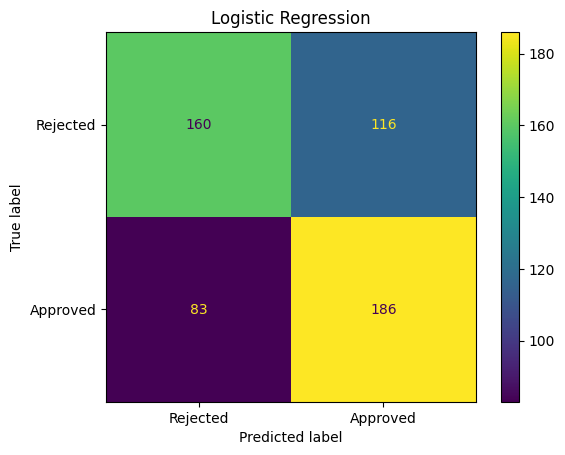

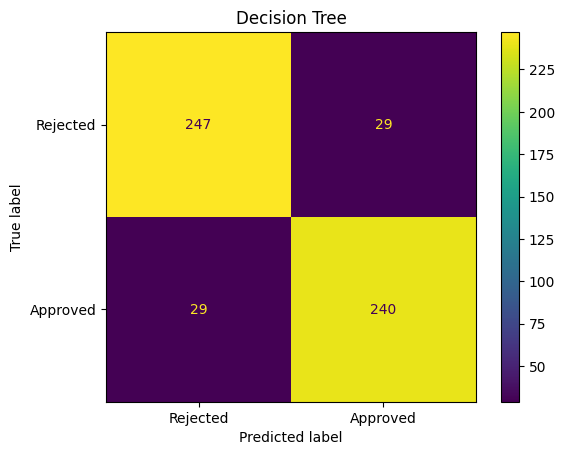

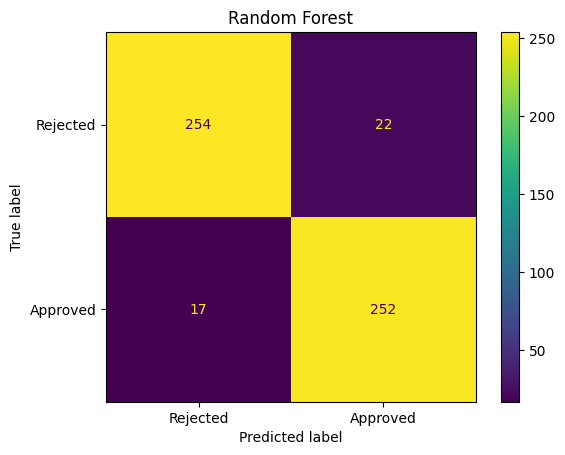

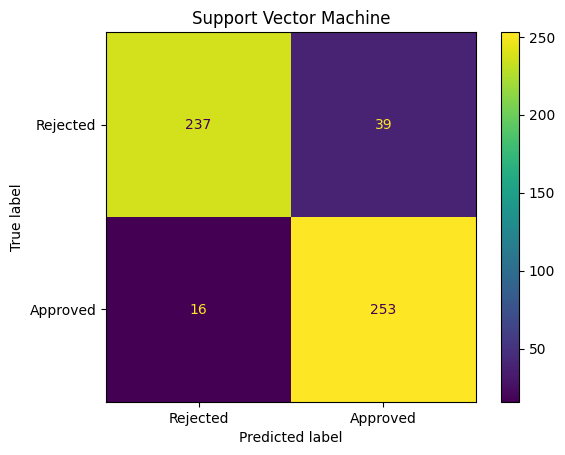

In [ ]:
# performance evaluation

# confusion matrix
# logistic regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Rejected', 'Approved'])
plt.title('Logistic Regression')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['Rejected', 'Approved'])
plt.title('Decision Tree')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Rejected', 'Approved'])
plt.title('Random Forest')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, display_labels=['Rejected', 'Approved'])
plt.title('Support Vector Machine')
plt.show()



In [ ]:
# performance evalutaion

def per_func(y_true, y_pred):
    return {
        'Accuracy': round(accuracy_score(y_test, y_pred)*100, 2),
        'Precision': round(precision_score(y_test, y_pred)*100, 2),
        'Recall': round(recall_score(y_test, y_pred)*100, 2),
        'F1 score': round(f1_score(y_test, y_pred)* 100)
    }

performance_dict = {
    'Logistic Regression': per_func(y_test, y_pred_lr),
    'Decision Tree': per_func(y_test, y_pred_dt),
    'Support Vector Machine': per_func(y_test, y_pred_svc),
    'Random Forest': per_func(y_test, y_pred_rf)
}

performance_df = pd.DataFrame(performance_dict)

performance_df

,Logistic Regression,Decision Tree,Support Vector Machine,Random Forest
Accuracy,63.49,89.36,89.91,92.84
Precision,61.59,89.22,86.64,91.97
Recall,69.14,89.22,94.05,93.68
F1 score,65.00,89.00,90.00,93.00


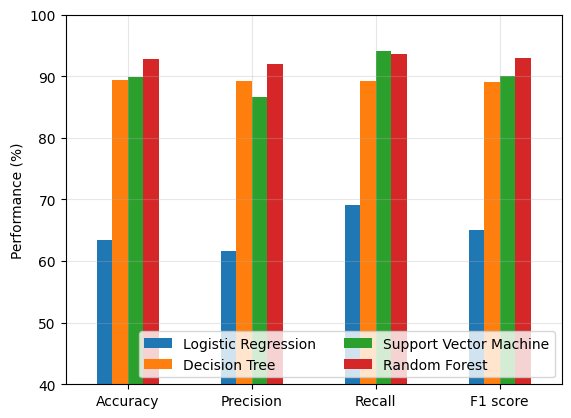

In [ ]:
# performance graph

performance_df.plot(kind='bar', rot=0)
plt.grid(alpha=0.3)
plt.legend(ncol=2, loc='lower right')
plt.ylim(40, 100)
plt.ylabel('Performance (%)')
plt.show()

In [ ]:

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# error
def error_func(y_test, y_pred):
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': math.sqrt(mean_squared_error(y_test, y_pred))
    }


error_dict = {
    'Logistic Regression': error_func(y_test, y_pred_lr),
    'Decision Tree': error_func(y_test, y_pred_dt),
    'Support Vector Machine': error_func(y_test, y_pred_svc),
    'Random Forest': error_func(y_test, y_pred_rf)
}


error_df = pd.DataFrame(error_dict)
error_df

,Logistic Regression,Decision Tree,Support Vector Machine,Random Forest
MAE,0.365138,0.106422,0.100917,0.071560
MSE,0.365138,0.106422,0.100917,0.071560
RMSE,0.604266,0.326224,0.317675,0.267506


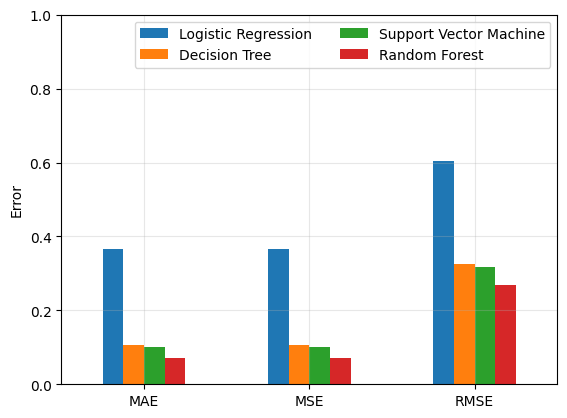

In [ ]:
# Error graph

error_df.plot(kind='bar', rot=0)
plt.grid(alpha=0.3)
plt.legend(ncol=2, loc='upper right')
plt.ylabel('Error')
plt.ylim(0,1)
plt.show()

In [ ]:
classes = {0: 'Rejected', 1: 'Approved'}

model = load('/content/random_forest.joblib')

pred_1 = model.predict(X_test.iloc[:2])

print("predicted class: " , [classes[i] for i in pred_1])
print("actual class: ", [classes[i] for i in y_test.iloc[:2]])


predicted class:  ['Rejected', 'Approved']
actual class:  ['Rejected', 'Approved']
